In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/BMW Sales.csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
# Using one-hot encoding for categorical data
df = pd.get_dummies(df, columns=['Model', 'Region', 'Fuel_Type', 'Color', 'Transmission'], drop_first=True)
df.head(10)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Region_South America,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Transmission_Manual
0,2016,3.5,151748,98740,8300,High,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,2013,1.6,121671,79219,3428,Low,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,2022,4.5,10991,113265,6994,Low,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,2024,1.7,27255,60971,4047,Low,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,2020,2.1,122131,49898,3080,Low,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
5,2017,1.9,171362,42926,1232,Low,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
6,2022,1.8,196741,55064,7949,High,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
7,2014,1.6,121156,102778,632,Low,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,2016,1.7,48073,116482,8944,High,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
9,2019,3.0,35700,96257,4411,Low,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True


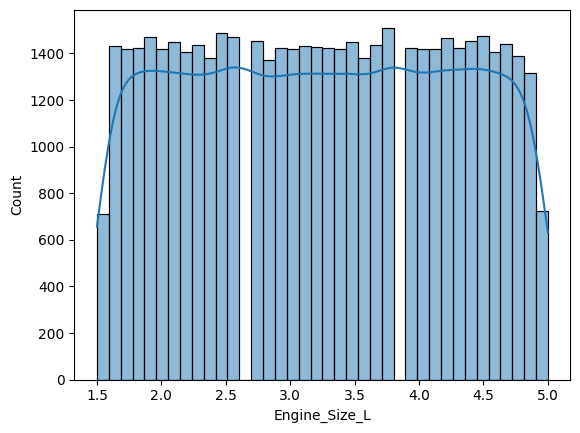

In [4]:
# Analyzing data distribution of 'Engine_Size_L'
sns.histplot(df['Engine_Size_L'], kde=True)
plt.show()

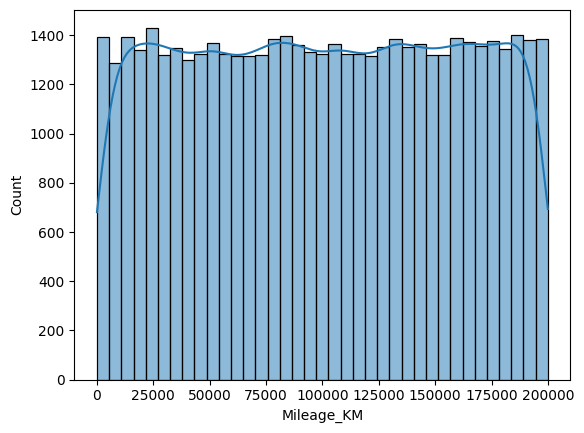

In [5]:
# Analyzing data distribution of 'Mileage_KM'
sns.histplot(df['Mileage_KM'], kde=True)
plt.show()

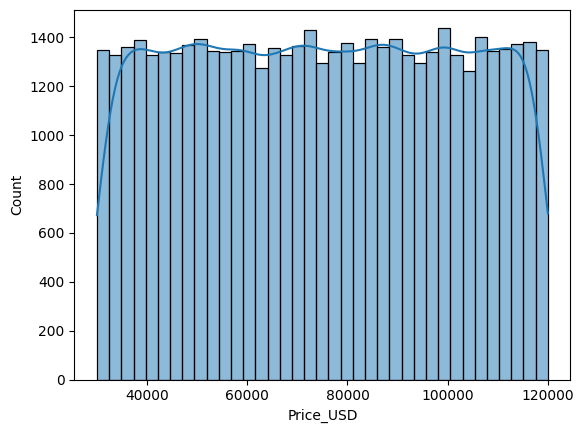

In [6]:
# Analyzing data distribution of 'Price_USD'
sns.histplot(df['Price_USD'], kde=True)
plt.show()

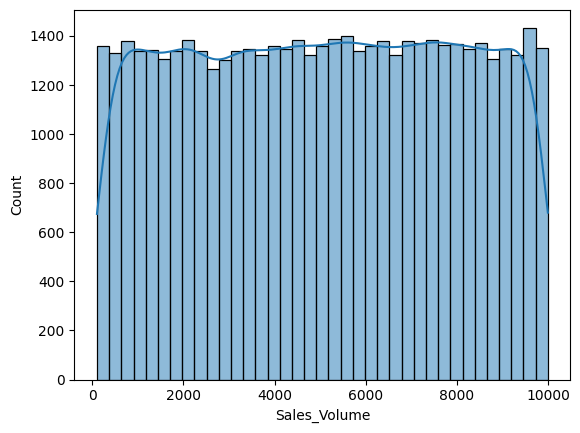

In [7]:
# Analyzing data distribution of 'Sales_Volume'
sns.histplot(df['Sales_Volume'], kde=True)
plt.show()

In [8]:
# Checking skewness and applying StandardScaler to numeric features(Logistic Regression requires feature scaling)
df['Engine_Size_L'].skew()
scaler_cols = ['Engine_Size_L', 'Price_USD']
standard_scaler = StandardScaler()
df[scaler_cols] = standard_scaler.fit_transform(df[scaler_cols])

In [9]:
# Checking skewness and applying RobustScaler to 'Mileage_KM'(Logistic Regression is sensitive to outliers)
df['Mileage_KM'].skew()
robust_scaler = RobustScaler()
df['Mileage_KM'] = robust_scaler.fit_transform(df[['Mileage_KM']])

In [10]:
# Feature encoding for 'Sales_Classification' (Target variable)
df['Sales_Classification'] = df['Sales_Classification'].map({'Low': 0, 'High': 1})